Ardiyanti Widyadana Prastuti

In [ ]:
#import library
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# read on dataset
import pandas as pd
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/coba/GlobalLandTemperaturesByCity.csv')

data_train

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
#drop for column
data_train.drop(['City', 'Latitude', 'Longitude'], axis = 1, inplace = True)
display(data_train)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,6.068,1.737,Denmark
1,1743-12-01,NaN,NaN,Denmark
2,1744-01-01,NaN,NaN,Denmark
3,1744-02-01,NaN,NaN,Denmark
4,1744-03-01,NaN,NaN,Denmark
...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Netherlands
8599208,2013-06-01,15.043,0.261,Netherlands
8599209,2013-07-01,18.775,0.193,Netherlands
8599210,2013-08-01,18.025,0.298,Netherlands


In [ ]:
#fetch data for year 2010 - 2013
data_train['dt'] = pd.to_datetime(data_train['dt'])
get_data = (data_train['dt'] > '2010-01-01') & (data_train['dt'] <= '2013-09-01')
data_train.loc[get_data]

data_train = data_train.loc[get_data]
display(data_train)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3195,2010-02-01,-2.691,0.272,Denmark
3196,2010-03-01,2.429,0.427,Denmark
3197,2010-04-01,7.123,0.234,Denmark
3198,2010-05-01,10.657,0.314,Denmark
3199,2010-06-01,14.989,0.272,Denmark
...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Netherlands
8599208,2013-06-01,15.043,0.261,Netherlands
8599209,2013-07-01,18.775,0.193,Netherlands
8599210,2013-08-01,18.025,0.298,Netherlands


In [ ]:
# fetch data for Netherlands Country
data_train = data_train.loc[data_train['Country'].isin(['Denmark', 'Netherlands'])]
display(data_train)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3195,2010-02-01,-2.691,0.272,Denmark
3196,2010-03-01,2.429,0.427,Denmark
3197,2010-04-01,7.123,0.234,Denmark
3198,2010-05-01,10.657,0.314,Denmark
3199,2010-06-01,14.989,0.272,Denmark
...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Netherlands
8599208,2013-06-01,15.043,0.261,Netherlands
8599209,2013-07-01,18.775,0.193,Netherlands
8599210,2013-08-01,18.025,0.298,Netherlands


In [ ]:
# drop column
data_train.drop(['Country'], axis = 1, inplace = True)
data_train.reset_index(drop = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dt,AverageTemperature,AverageTemperatureUncertainty
0,2010-02-01,-2.691,0.272
1,2010-03-01,2.429,0.427
2,2010-04-01,7.123,0.234
3,2010-05-01,10.657,0.314
4,2010-06-01,14.989,0.272
...,...,...,...
1227,2013-05-01,11.464,0.236
1228,2013-06-01,15.043,0.261
1229,2013-07-01,18.775,0.193
1230,2013-08-01,18.025,0.298


In [ ]:
#check using isnull function
data_train.isnull().sum()

dt                                0
AverageTemperature               28
AverageTemperatureUncertainty    28
dtype: int64

In [ ]:
#check Average using isnull function
data_train.dropna(subset = ['AverageTemperature'], inplace = True)
data_train.dropna(subset = ['AverageTemperatureUncertainty'], inplace = True)
data_train.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

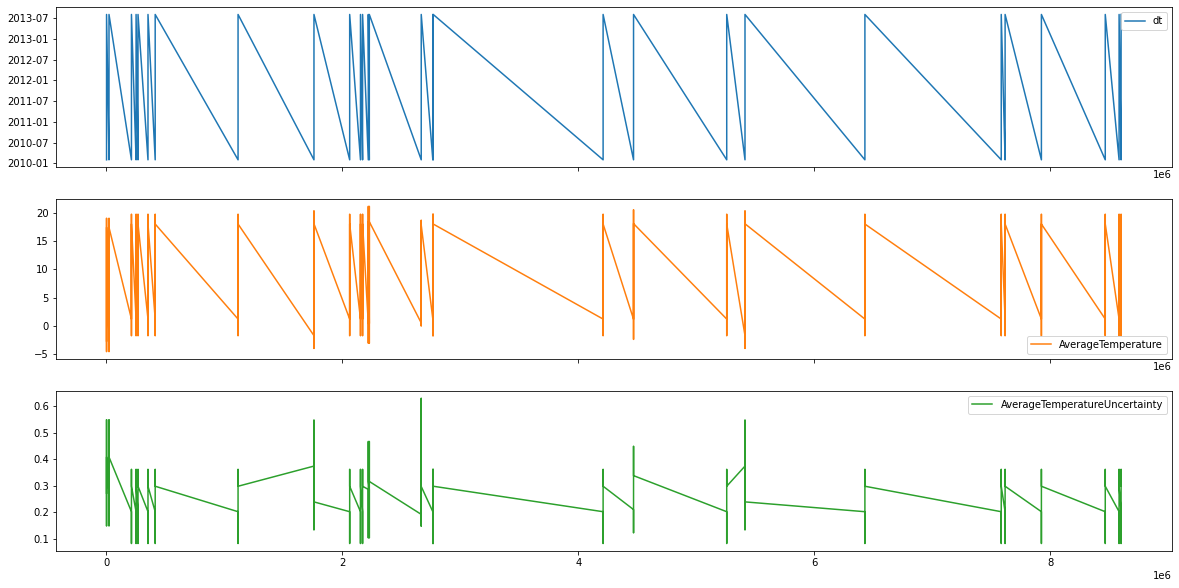

In [ ]:
#plot
df_plot = data_train
df_plot[df_plot.columns.to_list()].plot(subplots = True, figsize = (20, 10))
plt.show()

Text(0.5, 0, 'datetime')

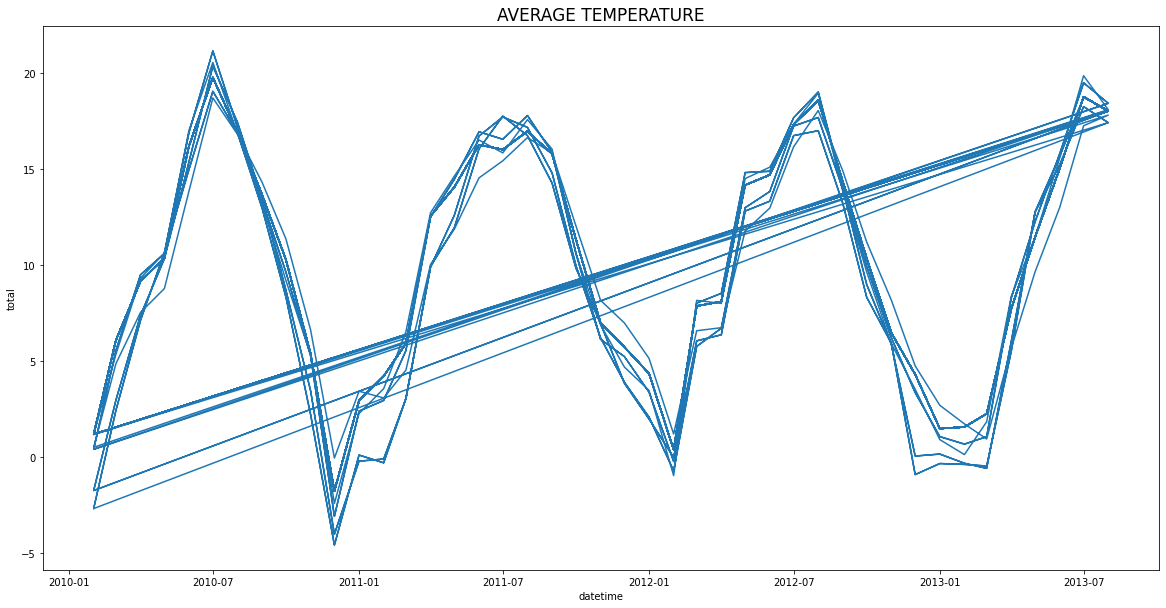

In [ ]:
dates = data_train['dt'].values
temp = data_train['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize = (20, 10))
plt.plot(dates, temp)

plt.title('AVERAGE TEMPERATURE', fontsize = 17)
plt.ylabel('total')
plt.xlabel('datetime')

In [ ]:
#check type
data_train.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
dtype: object

In [ ]:
#split for dataset
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size = 0.8, test_size = 0.2, shuffle = False)

print('Number of Train Data : ', len(x_train))
print('Number of Validation Data : ', len(x_valid))

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
  ds = ds.flat_map(lambda w : w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w : (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

Number of Train Data :  963
Number of Validation Data :  241


In [ ]:
#sequential model, lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size = 64, batch_size = 200, shuffle_buffer = 1000)
val_set = windowed_dataset(x_valid, window_size = 64, batch_size = 200, shuffle_buffer = 1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [ ]:
#mae average
Mae = (data_train['AverageTemperature'].max() - data_train['AverageTemperature'].min()) * 10/100
print(Mae)

2.5757


In [ ]:
#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 2.5 and logs.get('val_mae') < 2.5):
      print("Mae of the model < 10% data scale")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#optimizer
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=350, validation_data = val_set, callbacks=[callbacks])

Epoch 1/350
5/5 [==============================] - 13s 1s/step - loss: 3.5910 - mae: 4.0664 - val_loss: 3.4157 - val_mae: 3.8868
Epoch 2/350
5/5 [==============================] - 5s 954ms/step - loss: 3.5838 - mae: 4.0609 - val_loss: 3.4048 - val_mae: 3.8766
Epoch 3/350
5/5 [==============================] - 5s 969ms/step - loss: 3.5734 - mae: 4.0481 - val_loss: 3.3940 - val_mae: 3.8617
Epoch 4/350
5/5 [==============================] - 5s 959ms/step - loss: 3.5583 - mae: 4.0351 - val_loss: 3.3739 - val_mae: 3.8468
Epoch 5/350
5/5 [==============================] - 5s 966ms/step - loss: 3.5405 - mae: 4.0186 - val_loss: 3.3573 - val_mae: 3.8278
Epoch 6/350
5/5 [==============================] - 7s 1s/step - loss: 3.5231 - mae: 3.9987 - val_loss: 3.3416 - val_mae: 3.8087
Epoch 7/350
5/5 [==============================] - 5s 975ms/step - loss: 3.5036 - mae: 3.9800 - val_loss: 3.3154 - val_mae: 3.7912
Epoch 8/350
5/5 [==============================] - 5s 954ms/step - loss: 3.4861 - mae: 3

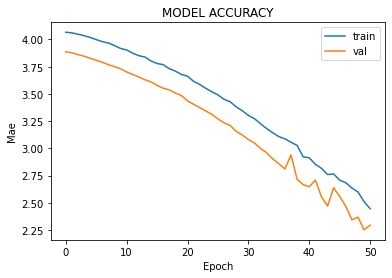

In [ ]:
#plot
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MODEL ACCURACY')
plt.xlabel('Epoch')
plt.ylabel('Mae')
plt.legend(['train', 'val'], loc = 'best')
plt.show()

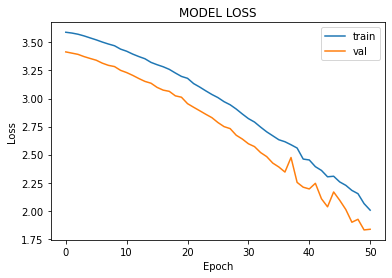

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc = 'best')
plt.show()